In [1]:
# Intro: Prioritizing the informative reads



In [196]:
# Required packages.

import gzip
from tqdm import tqdm
from collections import Counter
import pandas as pd
import os
import numpy as np
import itertools
import re
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
import random
from collections import OrderedDict
import pysam


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 636803.16it/s]


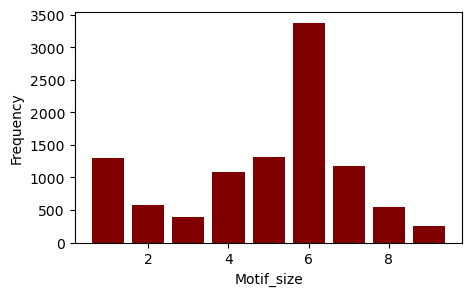

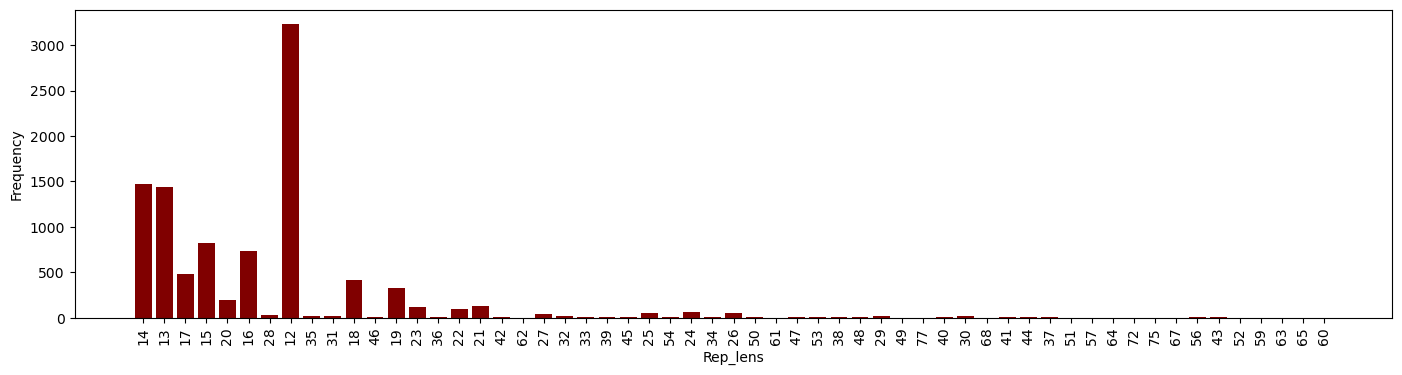

In [239]:
# Randomly picking Repeat regions.

Selective_regions = {}

Random_lines = random.sample(list(open('../../Analysis_KT/9mer_chr1_columns.tsv')), k = 10000)


for i in tqdm(range(10000)):
    
    #
    line = Random_lines[i].strip().split('\t')    
    region = f'{line[0]}:{line[1]}-{line[2]}'
    Selective_regions[region] = [line[0], line[1], line[2], line[3], line[4]]
    
    
    
# Checking if all the motif sizes and rep lens are coverd.
Motif_sizes = [len(x[-2]) for x in Selective_regions.values()]
Rep_lens = [x[-1] for x in Selective_regions.values()]

#
Motif_sizes1 = Counter(Motif_sizes)
Rep_lens1 = Counter(Rep_lens)
Mean = np.mean(list(Motif_sizes1.values()))
std = np.std(list(Motif_sizes1.values()))



# Plotting distribution of Motif sizes.
x = Motif_sizes1.values()
y = list(Motif_sizes1.keys())
plt.figure(figsize=(5, 3))
plt.bar(y,x, color='maroon')
plt.xlabel('Motif_size') 
plt.ylabel('Frequency') 
plt.show()

# # Plotting distribution of Repeat lens.
x = Rep_lens1.values()
y = list(Rep_lens1.keys())
plt.figure(figsize=(17, 4))
plt.bar(y,x, color='maroon')
plt.xticks(rotation=90)
plt.xlabel('Rep_lens') 
plt.ylabel('Frequency') 
plt.show()

In [195]:
# Above we have list of repeat regions from only chr1, which we are going to pull the information from the .bam file.


# Parsing the .cram file and getting the reads info.

In [197]:
# .cram - file source = HG00404.

samfile = pysam.AlignmentFile("../../data_pysam/HG00404.final.cram", "rc")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:13<00:00, 136.05it/s]


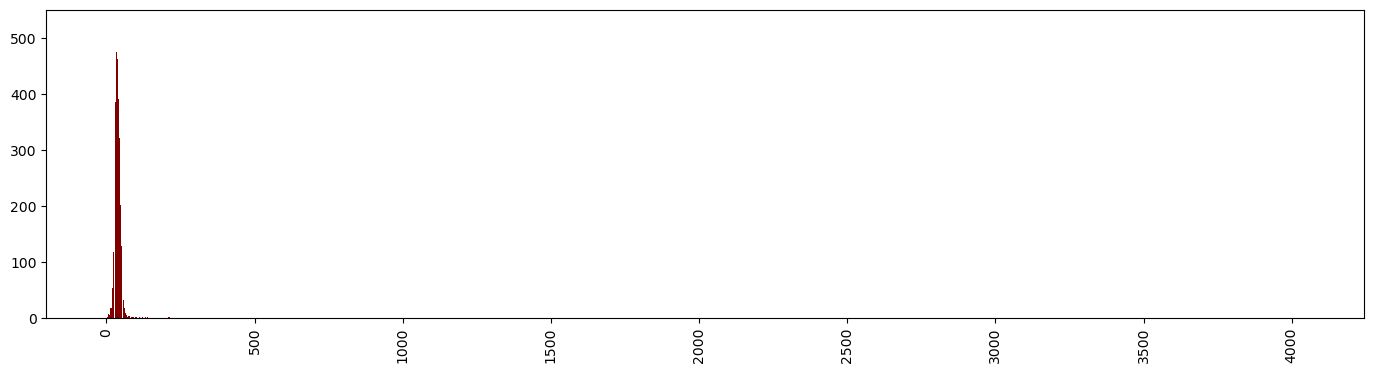

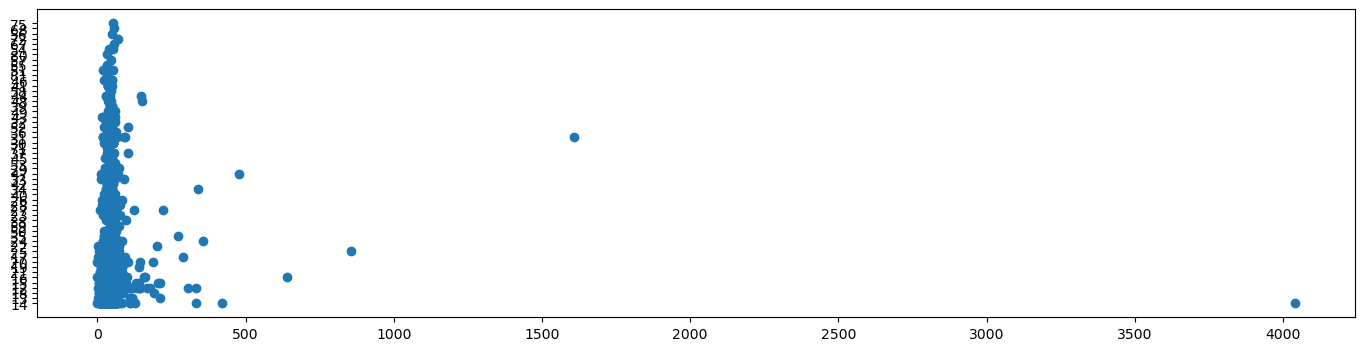

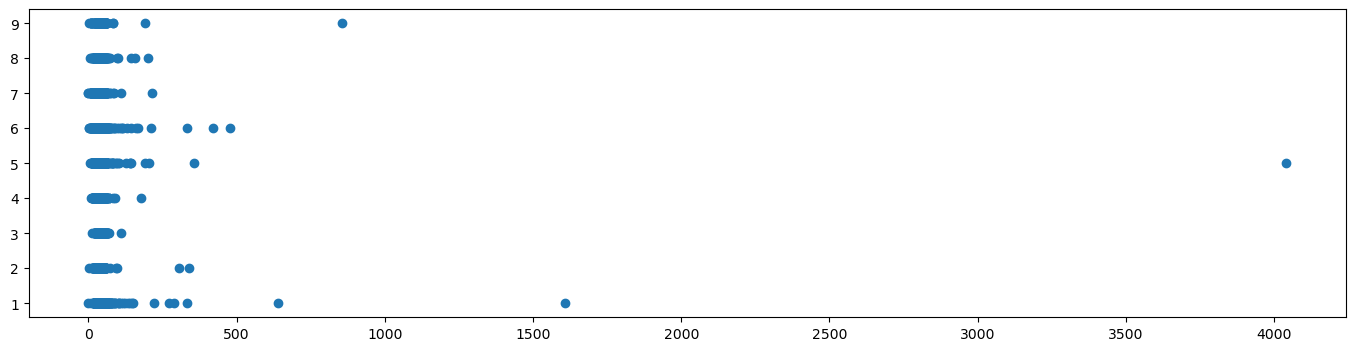

In [227]:
# Here we can ittereate the object samfile to access the lines.

Read_depths = []
Motif_sizes = []
Rep_lens = []


# Loop itterates the random 50000k regions
for cordinate_info in tqdm(Selective_regions):

    
    # corrdinate info:
    chrom = Selective_regions[cordinate_info][0]
    start = int(Selective_regions[cordinate_info][1])
    end = int(Selective_regions[cordinate_info][2])
    
    # Region_info contains current itteration repeat regions corridinates to fetch the supporting reads.
    Region_info = samfile.fetch(chrom, start, end)
    Region_depth = len(list(Region_info))
    
    # appending the region's depth, motif_sizes, rep_lens.
    Read_depths.append(Region_depth)
    Motif_sizes.append(len(Selective_regions[cordinate_info][3]))
    Rep_lens.append(Selective_regions[cordinate_info][-1])
    


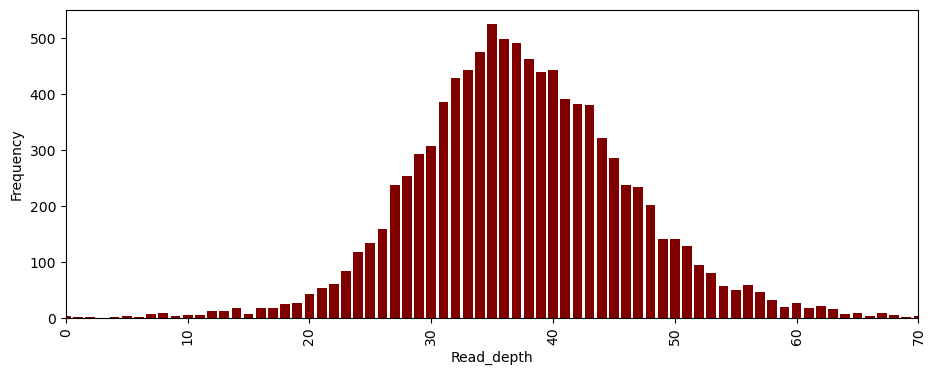

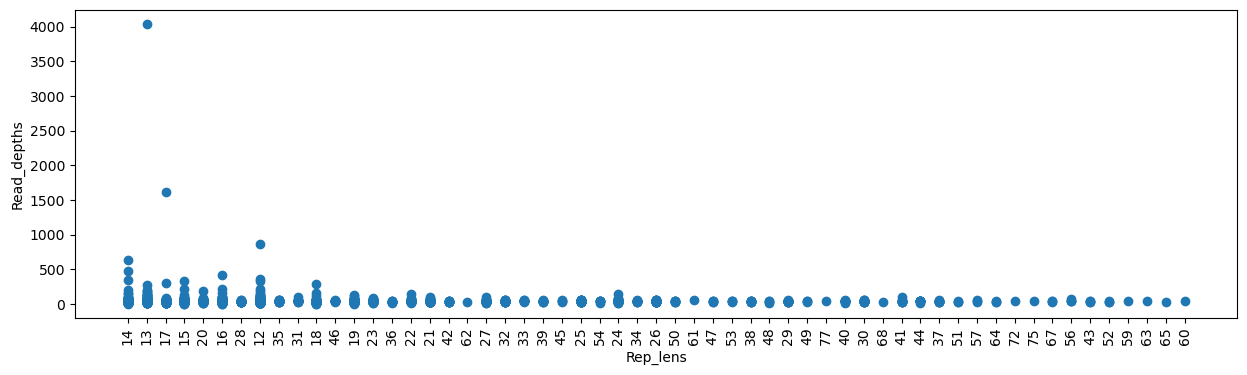

In [258]:
# Plotting the graph for depth distribution & depth (vs) rep_len and motif size.
Read_depths_graph = Counter(Read_depths)



#read depth distribution
x = Read_depths_graph.values()
y = list(Read_depths_graph.keys())
plt.figure(figsize=(11, 4))
plt.bar(y,x, color='maroon')
plt.xticks(rotation=90)
plt.xlim([0, 70])
plt.xlabel('Read_depth') 
plt.ylabel('Frequency') 
plt.show()



# read depth (vs) rep_lens
plt.figure(figsize=(15, 4))
plt.scatter(Rep_lens, Read_depths)
plt.xticks(rotation=90)
plt.xlabel('Rep_lens') 
plt.ylabel('Read_depths') 
plt.show()

# read depth (vs) motif_size
# plt.figure(figsize=(9, 4))
# plt.bar(Motif_sizes,Read_depths)
# plt.xlabel('Motif_sizes') 
# plt.ylabel('Read_depths') 
# plt.show()

In [ ]:
# What all we check for the genotyping a loci.

